In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

In [2]:
train1 = pd.read_csv("train_1.csv")
train1.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y
0,22203,320000,2,1,2,27,1,2,1
1,1288,470000,1,2,1,41,-2,-2,0
2,11822,20000,1,2,2,25,1,2,0
3,15085,80000,1,3,1,41,0,0,1
4,6192,30000,1,1,2,30,1,-2,1


In [3]:
# Data Preprocessing
train1.drop("Ref.No",axis=1,inplace=True)
train1.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,320000,2,1,2,27,1,2,1
1,470000,1,2,1,41,-2,-2,0
2,20000,1,2,2,25,1,2,0
3,80000,1,3,1,41,0,0,1
4,30000,1,1,2,30,1,-2,1


In [4]:
train1.shape

(21600, 8)

In [5]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 0 to 21599
Data columns (total 8 columns):
X1    21600 non-null int64
X2    21600 non-null int64
X3    21600 non-null int64
X4    21600 non-null int64
X5    21600 non-null int64
X6    21600 non-null int64
X7    21600 non-null int64
Y     21600 non-null int64
dtypes: int64(8)
memory usage: 1.3 MB


#### There are no missing values in the data

In [6]:
train1.describe()

,X1,X2,X3,X4,X5,X6,X7,Y
count,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,165235.818519,1.626991,1.845926,1.558704,35.382361,-0.002917,-0.124028,0.223796
std,129013.755215,0.483616,0.781139,0.522008,9.266769,1.126164,1.201892,0.416797
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,1.000000


In [7]:
train1.corr()

,X1,X2,X3,X4,X5,X6,X7,Y
X1,1.000000,0.034904,-0.227472,-0.105628,0.149632,-0.266460,-0.294104,-0.150885
X2,0.034904,1.000000,0.016744,-0.036408,-0.098736,-0.061844,-0.071631,-0.038559
X3,-0.227472,0.016744,1.000000,-0.139503,0.166523,0.108855,0.126305,0.023008
X4,-0.105628,-0.036408,-0.139503,1.000000,-0.412459,0.013404,0.020276,-0.031020
X5,0.149632,-0.098736,0.166523,-0.412459,1.000000,-0.037337,-0.053494,0.008051
X6,-0.266460,-0.061844,0.108855,0.013404,-0.037337,1.000000,0.669413,0.319002
X7,-0.294104,-0.071631,0.126305,0.020276,-0.053494,0.669413,1.000000,0.258833
Y,-0.150885,-0.038559,0.023008,-0.031020,0.008051,0.319002,0.258833,1.000000


In [8]:
train1.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Y'], dtype='object')

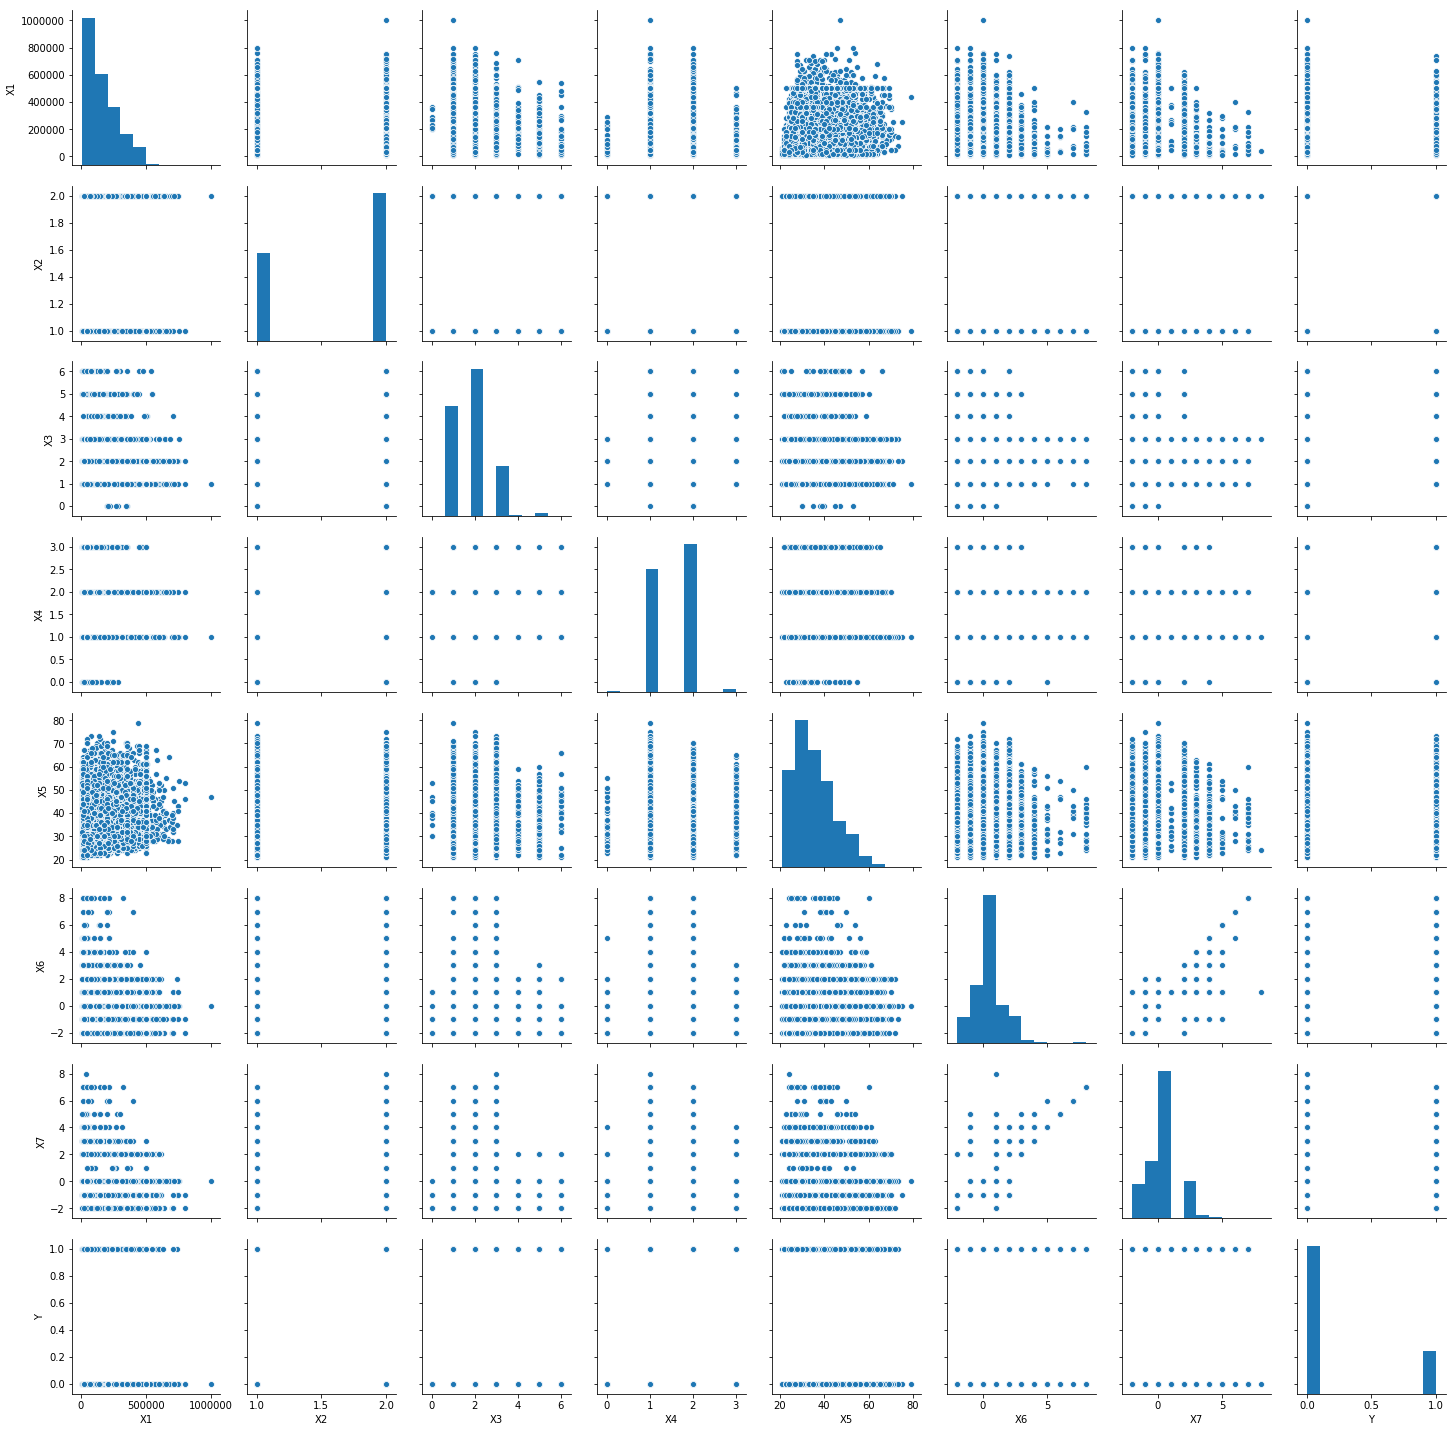

In [9]:
sns.pairplot(train1)

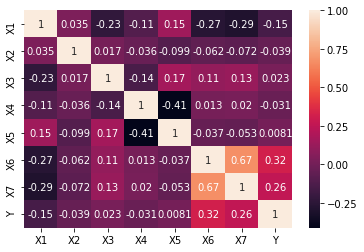

In [10]:
sns.heatmap(train1.corr(),annot=True)

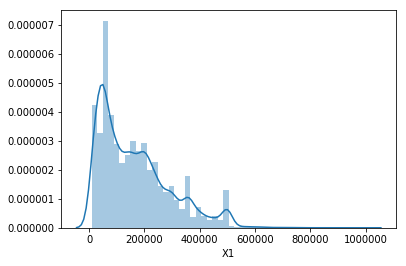

In [11]:
sns.distplot(train1.X1)

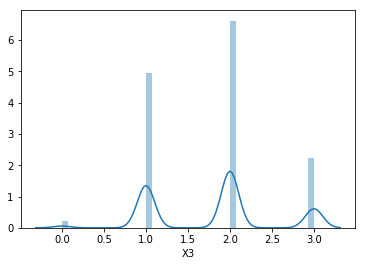

In [62]:
sns.distplot(train1.X3)

In [12]:
train1.X3.value_counts()

2    10211
1     7627
3     3447
5      190
4       82
6       34
0        9
Name: X3, dtype: int64

In [13]:
train1['X3'].replace({4:0,5:0,6:0}, inplace=True)
train1['X6'].replace({-2:0,-1:0},inplace=True)
train1['X7'].replace({-2:0,-1:0},inplace=True)

In [14]:
train1.X3.value_counts()

2    10211
1     7627
3     3447
0      315
Name: X3, dtype: int64

In [15]:
col=['X2','X3','X4']
dummy_train1=pd.get_dummies(train1,prefix=col,columns=col)

In [16]:
dummy_train1.head()

,X1,X5,X6,X7,Y,X2_1,X2_2,X3_0,X3_1,X3_2,X3_3,X4_0,X4_1,X4_2,X4_3
0,320000,27,1,2,1,0,1,0,1,0,0,0,0,1,0
1,470000,41,0,0,0,1,0,0,0,1,0,0,1,0,0
2,20000,25,1,2,0,1,0,0,0,1,0,0,0,1,0
3,80000,41,0,0,1,1,0,0,0,0,1,0,1,0,0
4,30000,30,1,0,1,1,0,0,1,0,0,0,0,1,0


In [17]:
X = train1.drop(['Y'], axis=1)
y = train1['Y']

In [18]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.3)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [22]:
tree.score(X_test, y_test)

0.8185185185185185

In [23]:
train1['Y'].value_counts()

0    16766
1     4834
Name: Y, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size = 0.3)

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [26]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [27]:
tree.fit(X_train,y_train)
ypred = tree.predict(X_test)

In [28]:
tree.score(X_test,y_test)

0.8185185185185185

In [29]:
test = pd.read_csv("test.csv")
test.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,17083,50000,2,1,2,25,0,0,0,0,...,38008,31898,20154,2000,5040,8034,3029,5000,49436,NaN
1,3494,120000,2,2,2,24,0,0,0,0,...,6761,7189,1087,1400,1000,0,1000,1087,801,NaN
2,21945,120000,2,2,2,27,1,-2,-1,-1,...,0,0,0,0,2382,0,0,0,0,NaN
3,3499,60000,1,1,2,28,0,-1,0,0,...,9900,310,160,6000,10000,900,310,0,3400,NaN
4,18973,100000,2,1,2,28,3,2,0,0,...,53407,51951,53195,0,1831,4339,0,2083,1939,NaN


In [30]:
test1 = test[['X1','X2','X3','X4','X5','X6','X7']]

In [31]:
X = train1.drop('Y', axis = 1)
y = train1['Y']

In [32]:
X_train = sc.fit_transform(X)
X_test = sc.transform(test1)

/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [33]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
tree.fit(X_train, y)
ypred = tree.predict(X_test)

In [34]:
ypred

array([0, 0, 0, ..., 1, 1, 0])

In [35]:
df1 = pd.DataFrame(np.arange(1,2400), columns = ['Ref.No'])

In [36]:
df2 = pd.DataFrame(ypred, columns = ['Y'])

In [37]:
submission = pd.concat([df1,df2], axis = 1)

In [38]:
submission.to_csv('Submission1.csv', index = False)

In [39]:
# Merging train_1 and train_2 and train_3

In [40]:
train2 = pd.read_csv('train_2.csv')

In [41]:
train2.head()

,Ref.No,X8,X9,X10,X11,X12,X13,X14,X15
0,22203,2,2,2,2,43243,42537,41370,40694
1,1288,-2,-2,-2,-1,13780,12242,32463,20621
2,11822,0,0,0,0,20415,18266,18921,19297
3,15085,0,0,0,-1,76015,77582,60311,62471
4,6192,-2,-2,-2,-2,0,0,0,0


In [42]:
train3 = pd.read_csv('train_3.csv')

In [43]:
train3.head()

,Ref.No,X16,X17,X18,X19,X20,X21,X22,X23
0,22203,39606,38680,2000,1500,2000,1500,1500,0
1,1288,13711,8294,12300,32520,34,68,8334,45684
2,11822,18926,17717,1264,1249,625,700,1000,1000
3,15085,21071,2099,3008,3000,5000,10000,2099,0
4,6192,0,0,0,0,0,0,0,0


In [44]:
new_data = pd.concat([train1, train2, train3], axis=1).drop('Ref.No', axis=1)

In [45]:
new_data.head()

,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,320000,2,1,2,27,1,2,1,2,2,...,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,470000,1,2,1,41,0,0,0,-2,-2,...,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,20000,1,2,2,25,1,2,0,0,0,...,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,80000,1,3,1,41,0,0,1,0,0,...,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,30000,1,1,2,30,1,0,1,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [46]:
new_data1 = new_data.drop('Y', axis=1)

In [47]:
new_data1= pd.concat([new_data1,new_data['Y']],axis=1)

In [48]:
new_data1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,320000,2,1,2,27,1,2,2,2,2,...,40694,39606,38680,2000,1500,2000,1500,1500,0,1
1,470000,1,2,1,41,0,0,-2,-2,-2,...,20621,13711,8294,12300,32520,34,68,8334,45684,0
2,20000,1,2,2,25,1,2,0,0,0,...,19297,18926,17717,1264,1249,625,700,1000,1000,0
3,80000,1,3,1,41,0,0,0,0,0,...,62471,21071,2099,3008,3000,5000,10000,2099,0,1
4,30000,1,1,2,30,1,0,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [49]:
X = new_data1[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23']]

In [50]:
Y = new_data1[['Y']]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=42)

In [52]:
x_train.shape #Training

(15120, 23)

In [53]:
x_test.shape #Predicting

(6480, 23)

In [54]:
y_train.shape #Training

(15120, 1)

In [55]:
y_test.shape #Metrics

(6480, 1)

In [56]:
model = LogisticRegression()

In [57]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

model = model.fit(x_train,y_train)

In [59]:
y_pred = model.predict(x_test)

In [60]:
from sklearn.metrics import *

In [61]:
accuracy_score(y_test,y_pred)

0.7736111111111111

#### By using Logistic Regression, we are getting 77% accuracy here.

### Decision Tree Model

In [101]:
model_dt = DecisionTreeClassifier() 

In [66]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
y_pred = model_dt.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred)

0.7246913580246913

#### By using Decision Tree Model, we are getting 72% accuracy which is less.

In [70]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, splitter= 'best')
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)

In [71]:
accuracy_score(y_test, pred_dt)

0.8188271604938272

#### By using Decision tree Via Gini, The accuracy increased -> 81.88%

### Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [75]:
accuracy_score(y_test, pred_rf)

0.8016975308641975

In [77]:
model_rf = RandomForestClassifier(n_estimators=24,max_depth=6, criterion='entropy', verbose=0, n_jobs=-1, random_state=10)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [78]:
accuracy_score(y_test, pred_rf)

0.8145061728395062

#### By applying Random forest, we are getting 80% accuracy

### Bagging Model

In [83]:
from sklearn.ensemble import BaggingClassifier

In [84]:
bagg_model = BaggingClassifier()
bagg_model.fit(x_train, y_train)
pred_bagg = bagg_model.predict(x_test)

/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
accuracy_score(y_test, pred_bagg)

0.803395061728395

#### By applying Bagging Model, we are getting 80% accuracy here.

### Gradient Boost Model

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
grad_model = GradientBoostingClassifier(learning_rate=0.1)
grad_model.fit(x_train, y_train)
pred_grad = grad_model.predict(x_test)

/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
accuracy_score(y_test, pred_gra)

0.816358024691358

#### By applying Gradient Boosting Model, we are getting 80% accuracy here.

In [99]:
vote = VotingClassifier(estimators=[('Decision Tree', model_dt), ('Logistic Regression', model),('Random Forest', model_rf),('Bagging',bagg_model),('Gradient boost', grad_model)], voting='hard', n_jobs=-1)
vote.fit(x_train, y_train)
pred_vote = vote.predict(x_test)

/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ravindrasingh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
accuracy_score(y_test, pred_vote)

0.817283950617284

In [102]:
#### BY using VotingClassifier we are getting 81% accuracy here.

In [105]:
# submission2
submission.to_csv('Submission2.csv', index= False)